# Import Libraries

In [1]:
import numpy as np
import os
import cv2
import matplotlib.pyplot as plt
import pandas as pd
import math

# Load Data

### Import Load Data Functions

In [2]:
from LoadData import *

### Load Data and Preprocess

In [3]:
# load images
# train_images_a, train_labels_a = load_data('training-a', 'training-a.csv')
# train_images_a, train_labels_a = preprocess_data(train_images_a, train_labels_a)

# train_images_b, train_labels_b = load_data('training-b', 'training-b.csv')
# train_images_b, train_labels_b = preprocess_data(train_images_b, train_labels_b)

# train_images_c, train_labels_c = load_data('training-c', 'training-c.csv')
# train_images_c, train_labels_c = preprocess_data(train_images_c, train_labels_c)

# train_images = np.concatenate((train_images_a, train_images_b, train_images_c), axis=0)
# train_labels = np.concatenate((train_labels_a, train_labels_b, train_labels_c), axis=0)

train_images, train_labels = load_data('training-a', 'training-a.csv')
train_images, train_labels = preprocess_data(train_images, train_labels)

# print shapes
print("train_images.shape = ", train_images.shape)
print("train_labels.shape = ", train_labels.shape)
print("train_images[0].shape = ", train_images[0].shape)

train_images.shape =  (1000, 28, 28, 1)
train_labels.shape =  (1000,)
train_images[0].shape =  (28, 28, 1)


### Split data into train and validation

In [4]:
# suffle data
s = np.arange(train_images.shape[0])
np.random.shuffle(s)
train_images = train_images[s]
train_labels = train_labels[s]

# split data into train and validation
train_ratio = 0.8
X_train = train_images[:int(train_ratio*len(train_images))]
y_train = train_labels[:int(train_ratio*len(train_labels))]
X_val = train_images[int(train_ratio*len(train_images)):]
y_val = train_labels[int(train_ratio*len(train_labels)):]

# Model

### Import Layers

In [5]:
from ConvolutionLayer import ConvolutionLayer
from ReLULayer import ReLULayer
from MaxPoolingLayer import MaxPoolingLayer
from FlattenLayer import FlattenLayer
from FullyConnectedLayer import FullyConnectedLayer
from SoftmaxLayer import SoftmaxLayer

### Import Model Class

In [6]:
from Model import Model

### Model Building

In [7]:
# use lenet-5 model
model = Model(10)
model.add(ConvolutionLayer(6, 5, 1, 1))
model.add(ReLULayer())
model.add(MaxPoolingLayer(pool_size=2, stride=2))
model.add(ConvolutionLayer(16, 5, 1, 1))
model.add(ReLULayer())
model.add(MaxPoolingLayer(pool_size=2, stride=2))
model.add(FlattenLayer())
model.add(FullyConnectedLayer(output_size=120))
model.add(ReLULayer())
model.add(FullyConnectedLayer(output_size=84))
model.add(ReLULayer())
model.add(FullyConnectedLayer(output_size=10))
model.add(SoftmaxLayer())

### Train Model

epoch:  0
y_pred (first 10)	:  [0 9 9 4 0 7 6 1 6 9]
y_real (first 10)	:  [0 6 9 5 0 9 5 7 4 3]
Training loss:  3.445
Training accuracy:  0.18375
Training f1 score:  0.16147191185810478

y_pred (first 10)	:  [7 5 8 3 1 8 1 6 8 1]
y_real (first 10)	:  [3 2 7 0 9 5 3 6 5 7]
Validation loss:  3.725
Validation accuracy:  0.095
Validation f1 score:  0.07543855325738877


epoch:  1
y_pred (first 10)	:  [9 5 9 4 0 0 6 7 6 5]
y_real (first 10)	:  [0 6 9 5 0 9 5 7 4 3]
Training loss:  2.78625
Training accuracy:  0.23875
Training f1 score:  0.22413330971545334

y_pred (first 10)	:  [7 0 7 3 0 9 6 5 6 7]
y_real (first 10)	:  [3 2 7 0 9 5 3 6 5 7]
Validation loss:  2.715
Validation accuracy:  0.275
Validation f1 score:  0.24731071591520512




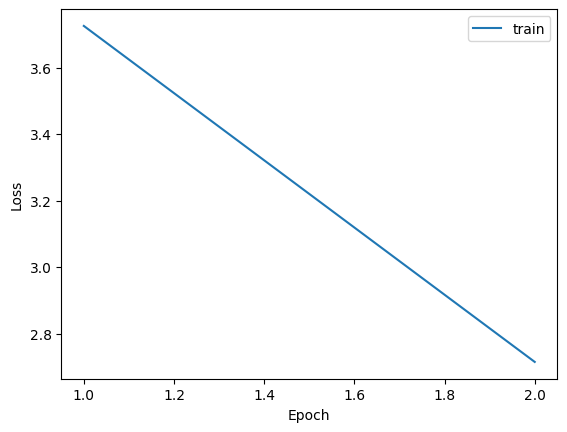

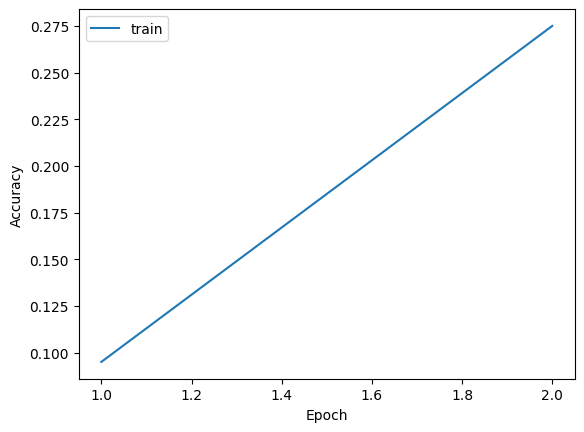

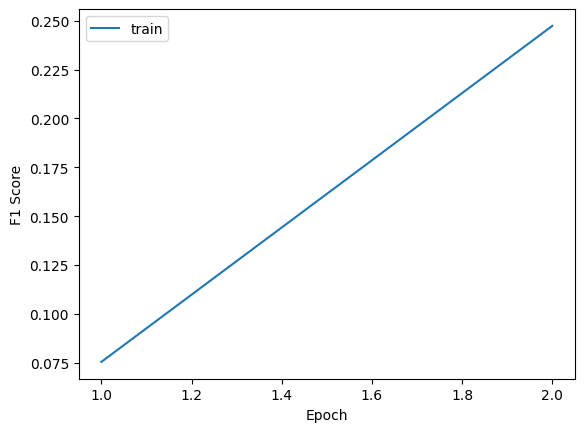

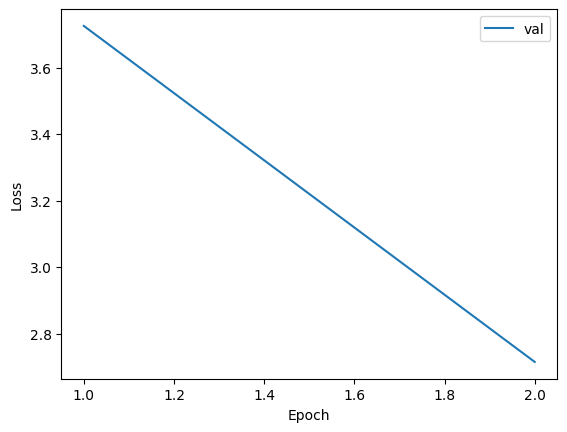

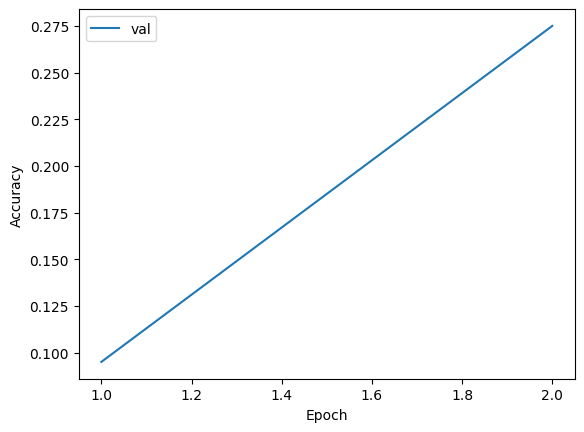

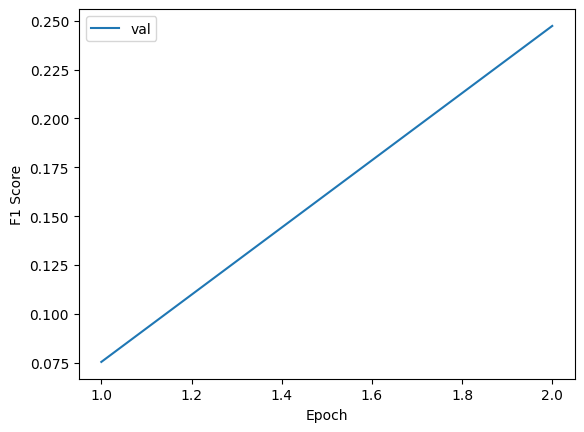

In [8]:
# train
model.train(X_train=X_train, y_train=y_train, X_val=X_val, y_val=y_val, learning_rate=0.00001, epochs=2, batch_size=64)

### Save Model

In [9]:
# Save the model using pickle
import pickle
with open('model.pkl', 'wb') as f:
    pickle.dump(model, f)

# Load the model using pickle
with open('model.pkl', 'rb') as f:
    model = pickle.load(f)


## Performace Metrics and Confusion Matrix

### Load Test Data

In [10]:
# load test images
test_images, test_labels = load_data('training-d', 'training-d.csv')
test_images, test_labels = preprocess_data(test_images, test_labels)

### Performance Matrics

In [11]:
# performance metrics and confusion matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

# predict   
y_pred = model.predict(test_images)

# print performance metrics
print("Accuracy: ", accuracy_score(test_labels, y_pred))
print("Confusion Matrix: ", confusion_matrix(test_labels, y_pred))

# print classification report
print("Classification Report: ", classification_report(test_labels, y_pred))

Accuracy:  0.2
Confusion Matrix:  [[54  1  4 10  5  2 11  6  4  4]
 [48  1  1 10  4 10  4  9  5  8]
 [28  2  4  4  1  7  2  5  9 37]
 [20  0  6 25  0 24  6  9 10  4]
 [17  0  1 12 18 11  7 16  5 10]
 [21  0  2 18  9 16  3 18  9  9]
 [30  1  1  7  1 13  8 11  6  9]
 [ 9  3  0 15  7 17  3 26  2 17]
 [ 7  1  8  6 11 10  5  7 27 18]
 [29  0  5  9  5 10  6 13 10 21]]
Classification Report:                precision    recall  f1-score   support

           0       0.21      0.53      0.30       101
           1       0.11      0.01      0.02       100
           2       0.12      0.04      0.06        99
           3       0.22      0.24      0.23       104
           4       0.30      0.19      0.23        97
           5       0.13      0.15      0.14       105
           6       0.15      0.09      0.11        87
           7       0.22      0.26      0.24        99
           8       0.31      0.27      0.29       100
           9       0.15      0.19      0.17       108

    accuracy   

### Confustion Matrix

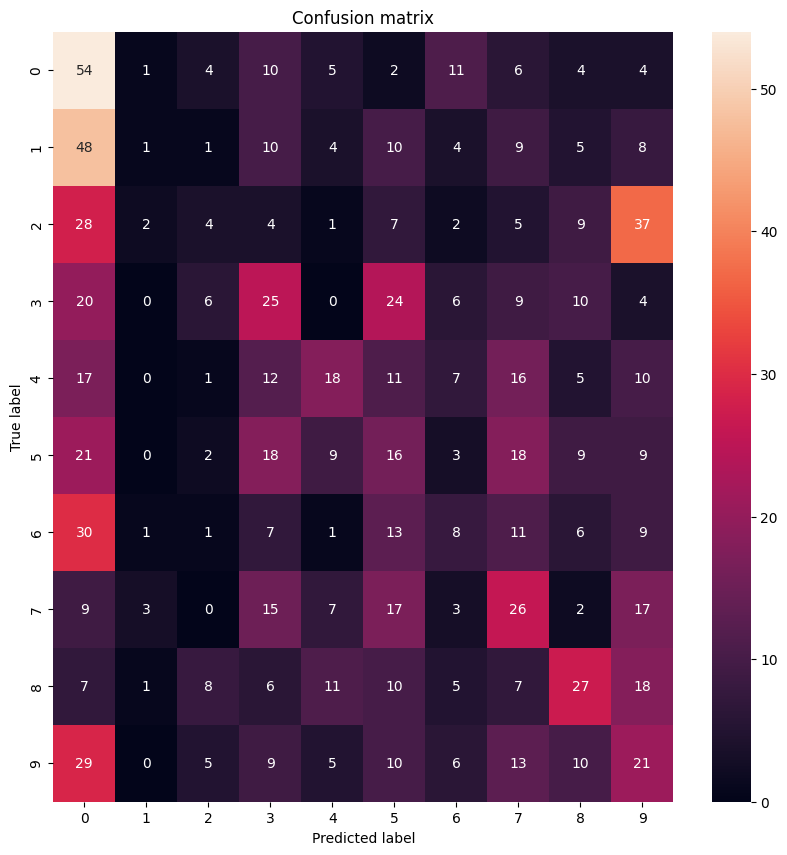

In [12]:
# plot confusion matrix using seaborn
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(test_labels, y_pred)
plt.figure(figsize=(10, 10))
sns.heatmap(cm, annot=True, fmt="d")
plt.title("Confusion matrix")
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()